# Introduction - Low Info Real Estate Price Estimator: Melbourne

Home ownership is a goal that many Australians wish to achieve in their lifetime. Not only Australia, but all around the world - buying a home is quite often the largest financial committment a person will ever make. So it makes sense to try and  understand the market as best as possible before making any offers.

Generally speaking, home buyers must rely on their own market knowledge and research to estimate home values. Information provided by the realtor tends to be biased towards a "fast sale", rather than what is in the best interest of the seller or buyer. In economics, this is what is known as an "agency problem" and it can be somewhat overcome by making more information available to both the buyer and seller.

Typically, the information provided in a real estate listing is quite limited. This also limits ones ability to make an informed decision about property vaule. When comparing dozens or even hundreds of properties, this can become overwhelming.

Imagine if there were a way for prospective home buyers to acurately predict the sale price of a property from just a handful of details. A tool to help buyers spot an underpriced bargain, and to help them avoid spendng time and resources researching overpriced properties. A tool that would help sellers know that they have 'priced' their property accordingly. Such a tool holds great intrinsic value for both buyers and sellers alike, and would surely have strong demand within any real estate market.


### Aim

The aim of this project is to employ machine learning to do the market research on behalf of both the buyers and the sellers in the real estate market.

The input features for this model must be limited only to inputs which are readily available to the market (ie. easily found in a newspaper or online property listing). 

This research will provide the basis to understanding if an "accurate" prediction can be made from such a small set of inputs.

As you will see, the winning model produced a mean prediction error of 15.5% in a short amount of time. This leaves plenty of scope for further improvements in accuracy, which is discussed further in the section titled "Insights & Analysis".

### The Dataset

The dataset used in this project is hosted by Kaggle 

Contains many types of data that are outside the scope or irrelevant to this project. For example, properties that didn't sell, properties which didn't disclose a price etc. This may introduce bias into our sample.

Two datasets available, a FULL version, and a truncated version. Given the self-imposed input restrictions of this project, we want as much data as possibe. The FULL version contained more relevant features than the truncated version, so this is what was used for analysis.

The five inputs are:
* Property Address
* Number of Bedrooms
* Number of Bathrooms
* Number of Car Spaces
* Name of the Real Estate Agency

From these five inputs, it is possible to derive the same features used in the final model. For example, from an input of "Property Address", we could derive the following features (found in the dataset); "Suburb", "Distance", "Longtitude" etc.



## Library Imports

Most people already understand the importance of a proper introduction to give visitors the proper context needed to understand the project. This is also where you should introduce the dataset and explain the challenge you're solving.

In [1]:
# Pandas and Numpy
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

# Matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn and style
import seaborn as sns
sns.set_style('darkgrid')

# Date and time
import datetime

# Pandas Profiling
import pandas_profiling

# Train, Test, Split
from sklearn.model_selection import train_test_split

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Label Encoder

from sklearn.preprocessing import LabelEncoder

# R^2 Score
from sklearn.metrics import r2_score

# GridsearchCV
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import make_pipeline

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

# Linear regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Random Forest and Gradient Boosting Decision Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
# Bring in the dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.shape

(34857, 21)

## Exploratory Analysis

### Typically Available Inputs: Newspaper
Browsing through a newspaper, a few features seem to be available for all properties listed:
* Suburb
* Address
* Bedrooms
* Bathrooms
* Car Spaces
* Real Estate Agency
* Real Estate Agents Name

Additional features which are listed on some, but not all property listings:
* Property Area (Square Metres)
* Property Type (Land, House, Apartment etc)
* Additional features (eg. swimming pool, living areas, office etc)

In [3]:
# Take a look at the df
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29527,Glen Iris,65 Renwick St,4,h,1735000.000,S,hockingstuart,6/01/2018,7.300,3146.000,4.000,3.000,2.000,361.000,nan,nan,Boroondara City Council,-37.851,145.068,Southern Metropolitan,10412.000
29458,Elwood,6/5 Joyce St,2,u,nan,PI,hockingstuart,6/01/2018,7.200,3184.000,nan,nan,nan,nan,nan,nan,Port Phillip City Council,nan,nan,Southern Metropolitan,8989.000
27961,Mernda,48 Galloway Dr,4,h,617500.000,S,HAR,18/11/2017,25.900,3754.000,nan,nan,nan,nan,nan,nan,Whittlesea City Council,nan,nan,Northern Metropolitan,5812.000
22931,Balwyn North,1 Hosken St,5,h,2800000.000,S,Marshall,26/08/2017,9.700,3104.000,5.000,2.000,2.000,1173.000,0.000,1960.000,Boroondara City Council,-37.804,145.091,Southern Metropolitan,7809.000
21122,Dandenong,3/21 Wilson St,2,u,nan,PI,O'Brien,16/09/2017,24.700,3175.000,2.000,1.000,1.000,nan,nan,2015.000,Greater Dandenong City Council,-37.990,145.220,South-Eastern Metropolitan,10894.000


In [4]:
# What datatypes are the features?
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

#### ToDo List:
* df.Method - Refine the dataset to only properties that sold (ie Method == S | SP | SA) - then drop df.Method
* df.Postcode should be of the type "object"
* df.Date should be set to "dateandtime" and have the months extracted.
* df.Address has high cardinality, might be able to extract "street_type" or "Street_name" to get more use from the feature. Then drop it. (Might be best left for "feature Engineering")
* df.BuildingArea and df.YearBuilt are not features that are readily available on a Real Estate listing, nor can they be easily determined from the available features. They should both be dropped from our model.
* The remaining features Suburb, Rooms, Type, SellerG, Distance, Bedroom2, Bathroom, Car, Landsize, CouncilArea, Lattitude, Longtitude, Regionname and Propertycount should all remain as part of our analysis for the time being, as these features can easily be found or derived from the information provided on a property listing.
* Once this cleaning has been done, will need to revisit "data exploration" to make sure everything looks OK.

## Data Cleaning

In [5]:
# Filter the df to only observations that sold, ie Method == 'S', 'SP', 'SA'
df = df.drop(df[(df['Method'] != 'S') & (df['Method'] != 'SP') & (df['Method'] != 'SA') ].index)
df.Method.unique()

array(['S', 'SP', 'SA'], dtype=object)

In [6]:
cols_to_drop = ['Method']

In [7]:
# Change df.Postcode to an object
df['Postcode'] = df.Postcode.astype(str)

In [8]:
# Change the format of df.Date
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
# Create 2 new features from df.Date - Month and Year *** Dropped 'Year' because it might confuse the model 
df['Month'] = df['Date'].dt.month
#df['Year'] = df['Date'].dt.year

In [10]:
cols_to_drop = cols_to_drop + ['Date', 'BuildingArea', 'YearBuilt']

In [11]:
cols_to_drop

['Method', 'Date', 'BuildingArea', 'YearBuilt']

### Exploratory Analysis Part 2

In [12]:
# Eyeball the DF to see if everything looks OK
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
23034,Camberwell,35 Bellett St,3,h,1855000.000,S,Fletchers,2017-08-26,7.700,3124.0,3.000,2.000,2.000,nan,149.000,1998.000,Boroondara City Council,-37.836,145.066,Southern Metropolitan,8920.000,8
24669,Richmond,13/200 Brighton St,2,u,736000.000,SP,Biggin,2017-10-14,2.400,3121.0,nan,nan,nan,nan,nan,nan,Yarra City Council,nan,nan,Northern Metropolitan,14949.000,10
26906,Chelsea,13 The Strand,2,h,1080000.000,SP,Ray,2017-11-11,27.000,3196.0,2.000,1.000,2.000,nan,nan,nan,Kingston City Council,-38.053,145.114,South-Eastern Metropolitan,3906.000,11
34207,Elwood,68 Milton St,4,h,nan,SP,Chisholm,2018-02-24,7.200,3184.0,4.000,3.000,2.000,490.000,nan,nan,Port Phillip City Council,-37.876,144.983,Southern Metropolitan,8989.000,2
21133,Diamond Creek,6 Ormonde Ct,4,h,nan,SP,Buckingham,2017-09-16,21.800,3089.0,4.000,2.000,4.000,744.000,nan,nan,Nillumbik Shire Council,-37.686,145.150,Northern Victoria,4258.000,9


In [13]:
# Double check changes have taken place, any more changes required? Month and Year should be of the 'object' type.
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
Month                     int64
dtype: object

In [14]:
# Change df.Month and df.Year to objects
df['Month'] = df.Month.astype(str)
#df['Year'] = df.Year.astype(str)

In [15]:
# Now that everything has been formatted, it's time to see a comprehensive analysis of the dataset
#pandas_profiling.ProfileReport(df)

### ToDo List:
* Instead of Month, try "Season" instead.
* Target variable "Price" has quite a few missing observations, should drop these
* Might also like to restrict the target to "Properties under $2.5 million" 

In [16]:
# Create a new feature/column for Season by copying the 'Month' column
df['Season'] = df.Month.copy()

In [17]:
# Replace the numerical month with it's corresponding season
df.Season.replace(['12', '1', '2'], 'Summer', inplace=True)
df.Season.replace(['3', '4', '5'], 'Autumn', inplace=True)
df.Season.replace(['6', '7', '8'], 'Winter', inplace=True)
df.Season.replace(['9', '10', '11'], 'Spring', inplace=True)

df.Season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

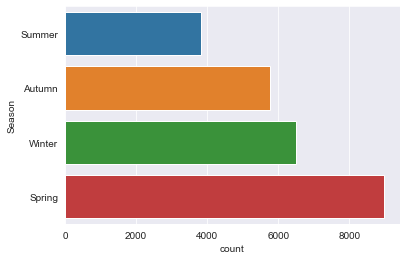

In [18]:
sns.countplot(y='Season', data=df)
plt.show()

In [19]:
# Drop the missing Price observations
df = df[df['Price'].notnull()]

In [20]:
#pandas_profiling.ProfileReport(df)

In [21]:
df.sample(7)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Season
14581,Reservoir,78 McMahon Rd,4,h,902000.000,S,Barry,2017-07-01,12.000,3073.0,4.000,2.000,3.000,700.000,nan,nan,Darebin City Council,-37.711,145.018,Northern Metropolitan,21650.000,7,Winter
6315,Malvern,8/236 Wattletree Rd,1,u,405000.000,S,Marshall,2016-06-27,7.400,3144.0,1.000,1.000,1.000,0.000,nan,nan,Stonnington City Council,-37.864,145.037,Southern Metropolitan,4675.000,6,Winter
12017,South Kingsville,2/3 New St,2,h,420000.000,SP,Jas,2016-07-26,9.100,3015.0,2.000,1.000,1.000,78.000,130.000,1980.000,Hobsons Bay City Council,-37.826,144.868,Western Metropolitan,984.000,7,Winter
18752,Taylors Lakes,1 Cowes Pl,4,h,853000.000,S,Barry,2017-07-15,15.500,3038.0,4.000,3.000,2.000,724.000,330.000,1990.000,Brimbank City Council,-37.709,144.787,Western Metropolitan,5336.000,7,Winter
12415,Brunswick East,164 Blyth St,4,h,1310000.000,S,Jellis,2017-04-08,4.500,3057.0,4.000,1.000,2.000,449.000,159.000,1930.000,Moreland City Council,-37.767,144.976,Northern Metropolitan,5533.000,4,Autumn
11422,Hawthorn East,4/43 Clifton Rd,2,u,706000.000,S,hockingstuart,2016-08-22,7.500,3123.0,2.000,1.000,1.000,172.000,90.000,1960.000,Boroondara City Council,-37.844,145.054,Southern Metropolitan,6482.000,8,Winter
8822,Richmond,27 Glass St,3,h,1115000.000,S,Whiting,2016-05-14,2.600,3121.0,3.000,2.000,2.000,129.000,120.000,1980.000,Yarra City Council,-37.824,145.005,Northern Metropolitan,14949.000,5,Autumn


In [22]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             0
Bedroom2          4927
Bathroom          4933
Car               5202
Landsize          7163
BuildingArea     12949
YearBuilt        11864
CouncilArea          2
Lattitude         4788
Longtitude        4788
Regionname           2
Propertycount        2
Month                0
Season               0
dtype: int64

In [23]:
# Drop the missing CouncilArea observations
df = df[df['CouncilArea'].notnull()]


In [24]:
# Just in case there are duplicates in the df
df = df.drop_duplicates()


In [25]:
# Bedroom2, Bathroom and Car need to have their missing values flagged
df['Bedroom2_Missing'] = df.Bedroom2.isnull().astype(int)
df['Bathroom_Missing'] = df.Bathroom.isnull().astype(int)
df['Car_Missing'] = df.Car.isnull().astype(int)

In [26]:
df.isnull().sum()

Suburb                  0
Address                 0
Rooms                   0
Type                    0
Price                   0
Method                  0
SellerG                 0
Date                    0
Distance                0
Postcode                0
Bedroom2             4925
Bathroom             4931
Car                  5200
Landsize             7161
BuildingArea        12947
YearBuilt           11862
CouncilArea             0
Lattitude            4786
Longtitude           4786
Regionname              0
Propertycount           0
Month                   0
Season                  0
Bedroom2_Missing        0
Bathroom_Missing        0
Car_Missing             0
dtype: int64

In [27]:
# Bedroom2 is highly correlated with Rooms, so fill missing values with corresponding "Rooms" value.
df.Bedroom2.fillna(df['Rooms'], inplace=True)

In [28]:
# Bathroom is more likely to be 1 compared to a zero
df.Bathroom.fillna(1, inplace=True)

In [29]:
df.groupby('Type').mean()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Bedroom2_Missing,Bathroom_Missing,Car_Missing
Type,,,,,,,,,,,,,,,
h,3.273,1154995.375,12.768,3.256,1.518,1.832,602.344,171.434,1959.936,-37.799,144.993,7401.795,0.147,0.147,0.165
t,2.852,921367.687,10.753,2.844,1.455,1.577,276.986,138.972,1999.417,-37.819,144.998,7339.823,0.429,0.430,0.430
u,2.033,638466.802,8.595,2.037,1.104,1.151,478.880,83.242,1979.771,-37.824,144.998,8181.203,0.411,0.411,0.412


In [30]:
df.Car.unique()

array([ 1.,  0.,  2., nan,  5.,  4.,  3.,  6.,  8.,  7., 10., 18., 11.])

In [31]:
# Car is more likely to be 1 compared to a zero
df.Car.fillna(1, inplace=True)

In [32]:
df.Car.unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  6.,  8.,  7., 10., 18., 11.])

In [33]:
df.dtypes

Suburb                      object
Address                     object
Rooms                        int64
Type                        object
Price                      float64
Method                      object
SellerG                     object
Date                datetime64[ns]
Distance                   float64
Postcode                    object
Bedroom2                   float64
Bathroom                   float64
Car                        float64
Landsize                   float64
BuildingArea               float64
YearBuilt                  float64
CouncilArea                 object
Lattitude                  float64
Longtitude                 float64
Regionname                  object
Propertycount              float64
Month                       object
Season                      object
Bedroom2_Missing             int32
Bathroom_Missing             int32
Car_Missing                  int32
dtype: object

In [34]:
df.SellerG.unique()

array(['Biggin', 'Jellis', 'Nelson', 'Dingle', 'Purplebricks', 'Greg',
       'LITTLE', 'Collins', 'Beller', 'Marshall', 'hockingstuart', 'Brad',
       'Maddison', 'Airport', 'Barry', 'Considine', 'McDonald', 'Rendina',
       'Frank', 'Ray', 'Prof.', 'Harcourts', 'Thomson', 'RT', "Sotheby's",
       'Cayzer', 'Chisholm', 'Brace', 'Holland', 'Miles', 'McGrath',
       'Love', 'Barlow', 'Village', 'Jas', 'Williams', 'Gunn&Co',
       'Sweeney', 'Burnham', 'Compton', 'FN', 'Hunter', 'Raine&Horne',
       'Buxton', 'Hodges', 'Gary', 'Fletchers', 'Woodards', 'Raine',
       'Walshe', 'Alexkarbon', 'Stockdale', 'Tim', 'Noel', 'Moonee',
       'HAR', 'Edward', 'Philip', 'North', 'Kay', 'Christopher',
       'Morrison', 'Mandy', 'R&H', 'RW', 'Lindellas', 'Assisi', "O'Brien",
       'C21', 'Paul', 'hockingstuart/Buxton', 'Matthew', 'Anderson',
       'Nick', 'Allens', 'Bells', 'Trimson', 'Douglas', 'YPA', 'GL',
       "Tiernan's", 'J', 'Rodney', 'Joseph', 'Harrington', 'Galldon',
       'Cham

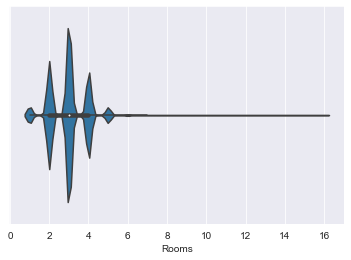

In [35]:
sns.violinplot('Rooms', data=df)
plt.show()

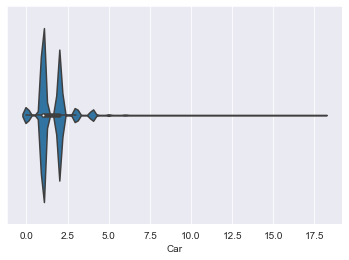

In [36]:
sns.violinplot('Car', data=df)
plt.show()

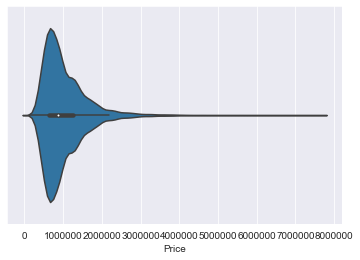

In [37]:
sns.violinplot('Price', data=df)
plt.show()

In [38]:
df.Price.mean()

1021721.0049281892

In [39]:
# Drop the Price observations over $2.5 million
df = df[df.Price < 2500000]

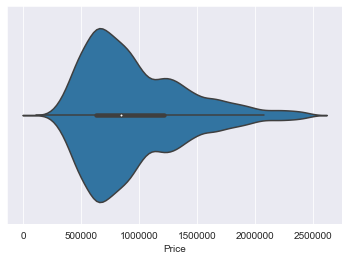

In [40]:
sns.violinplot('Price', data=df)
plt.show()

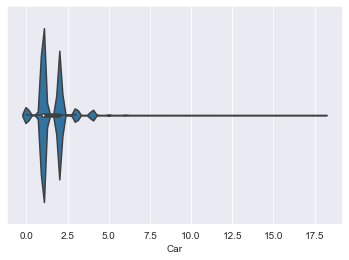

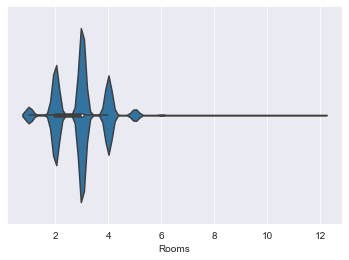

In [41]:
sns.violinplot('Car', data=df)
plt.show()
sns.violinplot('Rooms', data=df)
plt.show()

In [42]:
print((df.Rooms > 5).sum())
print((df.Car > 5).sum())
print((df.Car > 5).sum()/df.shape)

90
96
[0.00463858 3.69230769]


In [43]:
# Drop the Rooms and Car observations over 5
df = df[df.Rooms < 6]
df = df[df.Car < 6]

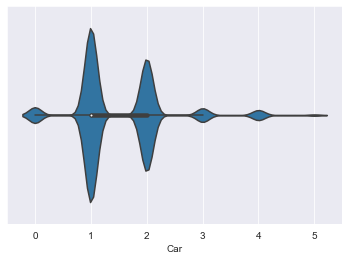

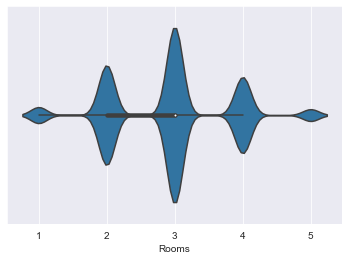

In [44]:
sns.violinplot('Car', data=df)
plt.show()
sns.violinplot('Rooms', data=df)
plt.show()

#### MAKE NOTE OF THE POPULATION RESTRICTIONS
* Property Value under $2.5 million
* Property has less than 6 Car spaces
* Property has less than 6 Rooms

In [45]:
df.dtypes[df.dtypes == 'object']

Suburb         object
Address        object
Type           object
Method         object
SellerG        object
Postcode       object
CouncilArea    object
Regionname     object
Month          object
Season         object
dtype: object

In [46]:
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [47]:
df.groupby('Regionname').median()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Bedroom2_Missing,Bathroom_Missing,Car_Missing
Regionname,,,,,,,,,,,,,,,
Eastern Metropolitan,3,990000.000,14.200,3.000,1.000,2.000,658.000,148.000,1970.000,-37.790,145.139,5030.000,0,0,0
Eastern Victoria,3,670000.000,35.200,3.000,2.000,2.000,792.000,159.500,1990.000,-38.026,145.333,8280.000,0,0,0
Northern Metropolitan,3,750000.000,8.800,3.000,1.000,1.000,409.000,118.000,1970.000,-37.733,144.985,8870.000,0,0,0
Northern Victoria,3,550000.000,31.700,3.000,2.000,2.000,713.500,149.000,2000.000,-37.618,144.680,4258.000,0,0,0
South-Eastern Metropolitan,3,801000.000,22.200,3.000,1.000,2.000,616.000,142.000,1975.000,-37.984,145.138,6162.000,0,0,0
Southern Metropolitan,3,1150000.000,9.700,3.000,1.000,1.000,348.000,121.000,1960.000,-37.868,145.040,7717.000,0,0,0
Western Metropolitan,3,745000.000,10.400,3.000,1.000,1.000,490.000,133.000,1975.000,-37.781,144.871,5498.000,0,0,0
Western Victoria,3,412000.000,29.800,3.000,1.000,2.000,602.000,122.860,1976.000,-37.698,144.573,4718.000,0,0,0


In [48]:
# Will drop the regions outside of Metro Melbourne
#regions_to_drop = ['Eastern Victoria', 'Northern Victoria', 'Western Victoria']
# Filter the df to only observations in metro Melb
df = df.drop(df[(df['Regionname'] == 'Eastern Victoria') | (df['Regionname'] == 'Northern Victoria') | (df['Regionname'] == 'Western Victoria') ].index)
df.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan'], dtype=object)

## Feature Engineering

Need to make some new variables from the address field. eg, st, ave, cir etc

In [49]:
# Extract the street type from the address feature
df['St_Type_1'] = (df['Address'].str.split(expand=True)[2])
df['St_Type_2'] = (df['Address'].str.split(expand=True)[3])
df.St_Type_2.unique()
df.St_Type_2.replace(['Nth', 'S', 'E', 'W', 'N'], None, inplace=True)

In [50]:
#df.St_Type.value_counts()

In [51]:
# Need to merge/concat the two "St_Type" cols
df['St_Type_2'].fillna(df.St_Type_1, inplace=True)
df.St_Type_2.value_counts()

St           9956
Rd           3598
Av           1942
Ct           1032
Dr            789
Cr            703
Gr            395
Pl            304
Pde           297
Wy            202
Cl            197
Bvd           106
La             98
Tce            78
Cct            60
Hwy            44
Avenue         39
Ri             33
Wk             31
Mw             24
Parade         17
Sq             13
Boulevard      11
Crescent       10
Esplanade       9
Strand          7
Cir             7
Grove           6
Prm             5
Gdns            5
             ... 
Victoria        1
Loop            1
Parks           1
Gld             1
Hth             1
Cove            1
Out             1
Circuit         1
Outlook         1
App             1
Crse            1
Mews            1
West            1
Aveue           1
Mears           1
Highway         1
Entrance        1
Brk             1
Pt              1
Terrace         1
Pass            1
Summit          1
Qy              1
Lairidge        1
Greenway  

In [52]:
#low_card_st_types = []
#for label in df.St_Type.index:
#    if len(df.St_Type.value_counts()) < 10:
#        low_card_st_types = low_card_st_types + [label]

In [53]:
#low_card_st_types

In [54]:
df['St_Type'] = df.St_Type_2

In [55]:
pd.options.display.max_rows = 200
#list = [label for label in [df.St_Type.value_counts() < 10]]
#list

In [56]:
# Use these mean figures to approx missing values
lattitude_dict = [df.groupby('Regionname').Lattitude.mean()]
lattitude_dict
longtitude_dict = [df.groupby('Regionname').Longtitude.mean()]
longtitude_dict

[Regionname
 Eastern Metropolitan         145.147
 Northern Metropolitan        144.985
 South-Eastern Metropolitan   145.152
 Southern Metropolitan        145.036
 Western Metropolitan         144.843
 Name: Longtitude, dtype: float64]

In [57]:
df.Longtitude.fillna(df.Longtitude.mean(), inplace=True)
df.Lattitude.fillna(df.Lattitude.mean(), inplace=True)

In [58]:
df.St_Type.replace(['Avenue', 'Ave', 'Aveue'], 'Av', inplace=True)
df.St_Type.replace('Boulevard', 'Bvd', inplace=True)
df.St_Type.replace(['street', 'Street'], 'St', inplace=True)
df.St_Type.replace('Parade', 'Pde', inplace=True)
df.St_Type.replace('Crescent', 'Cr', inplace=True)
df.St_Type.replace(['Circuit','Cir'], 'Cct', inplace=True)
df.St_Type.replace('Terrace', 'Tce', inplace=True)
df.St_Type.replace('Ridge', 'Rdg', inplace=True)
df.St_Type.replace('Esplanade', 'Esp', inplace=True)
df.St_Type.replace(['View', 'Views', 'Vs'], 'Vw', inplace=True)
df.St_Type.replace('Highway', 'Hwy', inplace=True)



In [59]:
df.shape

(20145, 29)

In [60]:
df.groupby('St_Type').median().sort_values('Price', ascending=False)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Bedroom2_Missing,Bathroom_Missing,Car_Missing
St_Type,,,,,,,,,,,,,,,
Victoria,3.000,2040000.000,7.500,3.000,1.000,2.000,783.000,nan,nan,-37.823,145.053,6482.000,0.000,0.000,0.000
Corso,3.000,1850000.000,21.500,3.000,2.000,2.000,617.000,nan,nan,-37.992,145.072,5087.000,0.000,0.000,0.000
Athol,4.000,1742000.000,9.000,4.000,2.000,2.000,780.000,nan,nan,-37.821,145.068,3265.000,0.000,0.000,0.000
Mall,4.000,1700000.000,14.200,4.000,1.000,1.000,nan,nan,nan,-37.805,144.994,13366.000,1.000,1.000,1.000
Woodland,4.000,1678000.000,16.700,4.000,2.000,2.000,943.000,nan,nan,-37.903,145.182,7392.000,0.000,0.000,0.000
Ridgeway,3.000,1640000.000,3.400,3.000,2.000,1.000,203.000,166.000,1900.000,-37.794,144.926,5263.000,0.000,0.000,1.000
Cove,3.000,1570000.000,3.800,3.000,2.000,1.000,210.000,211.000,1999.000,-37.838,144.927,8648.000,0.000,0.000,0.000
Grand,4.000,1510500.000,4.300,4.000,2.000,4.000,251.000,nan,nan,-37.784,144.894,4918.000,0.000,0.000,0.000
Grange,4.000,1365000.000,11.200,4.000,1.000,2.000,720.000,nan,nan,-37.874,145.053,8801.000,0.000,0.000,0.000


In [61]:
print(df.St_Type.value_counts())

St          9958
Rd          3598
Av          1983
Ct          1032
Dr           789
Cr           713
Gr           395
Pde          314
Pl           304
Wy           202
Cl           197
Bvd          117
La            98
Tce           79
Cct           68
Hwy           45
Ri            33
Wk            31
Mw            24
Sq            13
Esp           12
Vw             8
Strand         7
Grove          6
Rdg            6
Lp             5
Prm            5
Grn            5
Gdns           5
Fairway        4
Ch             4
Qd             4
Gra            4
Crest          3
Righi          3
Wky            3
Gln            3
Rt             3
Ambl           3
Grange         3
Wyn            3
Crossway       3
Bnd            3
Gwy            2
Res            2
Pky            2
East           2
Mall           1
Ps             1
Crofts         1
Glade          1
Dell           1
Eyrie          1
Al             1
West           1
Athol          1
Skyline        1
Ridgeway       1
Corso         

In [62]:
# Could potentially use an 'unsupervised' algorithm to group/cluster these Street Types based on the ave price

In [63]:
# Less than 3 occurrances of a st type and it can be called other. Flag sparse labels so they can be changed to 'Other'
st_other = df.St_Type.value_counts() < 3
st_other_list = st_other.astype(int)

In [64]:
# Copy the st_type column to a new col
df['St_Type_Other_1'] = df.St_Type.copy()

In [65]:
# Bring in the binary list flagged as '1' for labels then converted to 'other'
df.St_Type_Other_1.replace(st_other_list, inplace=True)
df.St_Type_Other_1.replace(1, 'Other', inplace=True)

In [66]:
df.St_Type_Other_1.unique()

array([0, 'Other'], dtype=object)

In [67]:
# Bring over the original labels for everything else
df['St_Type_Other_1'].replace(0, df.St_Type, inplace=True)
df.St_Type_Other_1.value_counts()

St          9958
Rd          3598
Av          1983
Ct          1032
Dr           789
Cr           713
Gr           395
Pde          314
Pl           304
Wy           202
Cl           197
Bvd          117
La            98
Tce           79
Cct           68
Other         47
Hwy           45
Ri            33
Wk            31
Mw            24
Sq            13
Esp           12
Vw             8
Strand         7
Grove          6
Rdg            6
Lp             5
Grn            5
Prm            5
Gdns           5
Fairway        4
Qd             4
Ch             4
Gra            4
Crossway       3
Wky            3
Righi          3
Ambl           3
Gln            3
Bnd            3
Rt             3
Crest          3
Wyn            3
Grange         3
Name: St_Type_Other_1, dtype: int64

In [68]:
# Less than 10 occurrances of an Agent and it can be called other
agent_other = df.SellerG.value_counts() < 10
agent_other_list = agent_other.astype(int)

df['Agent_Other'] = df.SellerG.copy()

df.Agent_Other.replace(agent_other_list, inplace=True)

df.Agent_Other.replace(1, 'Other', inplace=True)

In [69]:
df['Agent_Other'].replace(0, df.SellerG, inplace=True)
df.Agent_Other.value_counts()

Nelson           2017
Barry            1887
Jellis           1677
hockingstuart    1568
Ray              1307
Buxton           1079
Marshall          621
Biggin            529
Other             507
Brad              481
Woodards          453
Fletchers         412
YPA               362
McGrath           356
Stockdale         325
Jas               323
Sweeney           315
Greg              294
Noel              272
Harcourts         272
Miles             270
Gary              239
RT                217
HAR               212
Hodges            211
Raine             193
Love              187
RW                181
O'Brien           154
Williams          142
Village           134
Douglas           123
C21               105
Philip             99
Purplebricks       97
Eview              97
Buckingham         94
Chisholm           92
Darren             84
Rendina            84
Kay                81
Bells              74
Moonee             74
Collins            73
Morrison           69
LJ        

In [70]:
# ToDo: Label encode the large categorical features, create dummies where needed, drop irrelevant cols, save the abt

In [71]:
df.dtypes

Suburb                      object
Address                     object
Rooms                        int64
Type                        object
Price                      float64
Method                      object
SellerG                     object
Date                datetime64[ns]
Distance                   float64
Postcode                    object
Bedroom2                   float64
Bathroom                   float64
Car                        float64
Landsize                   float64
BuildingArea               float64
YearBuilt                  float64
CouncilArea                 object
Lattitude                  float64
Longtitude                 float64
Regionname                  object
Propertycount              float64
Month                       object
Season                      object
Bedroom2_Missing             int32
Bathroom_Missing             int32
Car_Missing                  int32
St_Type_1                   object
St_Type_2                   object
St_Type             

In [72]:
# Update our 'to drop' list
cols_to_drop = cols_to_drop + ['St_Type', 'St_Type_1', 'St_Type_2', 'Address', 'SellerG', 'Landsize']

In [73]:
# Copy over the DF to avoid messing up the original
df_clean = df.copy()

In [74]:
# Drop the flagged cols
df_clean.drop(cols_to_drop, axis=1, inplace=True)

In [75]:
# Setup and fit Label Encoder
le = LabelEncoder()
df_clean['Suburb'] = le.fit_transform(df_clean.Suburb)
df_clean['CouncilArea'] = le.fit_transform(df_clean.CouncilArea)
df_clean['St_Type_Other_1'] = le.fit_transform(df_clean.St_Type_Other_1)
df_clean['Agent_Other'] = le.fit_transform(df_clean.Agent_Other)

# Setup and fit remaining features as dummies
dummy_list = ['Regionname', 'Season', 'Type', 'Month']
df_clean = pd.get_dummies(df_clean, columns=dummy_list)


In [76]:
df_clean.isnull().sum()

Suburb                                   0
Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
CouncilArea                              0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Bedroom2_Missing                         0
Bathroom_Missing                         0
Car_Missing                              0
St_Type_Other_1                          0
Agent_Other                              0
Regionname_Eastern Metropolitan          0
Regionname_Northern Metropolitan         0
Regionname_South-Eastern Metropolitan    0
Regionname_Southern Metropolitan         0
Regionname_Western Metropolitan          0
Season_Autumn                            0
Season_Spri

In [77]:
abt = df_clean
abt.to_csv('Analytical_BaseTable.csv')

## Algorithm Selection

In [78]:
# Set the X and y vars for linear regression and decision tree algorithms
y = abt.Price
X = abt.drop('Price', axis=1)

## Model Training

In [79]:
# Split the dataset into 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [80]:
# Create a dictionary for each algorithm pipeline
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [81]:
# Create a dictionary for the hyperparameters to try for each algorithm
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [82]:
# Dictionary with the same keys as the pipelines dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [83]:
# Set and fit Standard Scaler to the training dataset
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
# Fit all models with GridSearchCV (takes a while)
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

C:\Users\Blake\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6357246371580.375, tolerance: 278877033292.16833
  positive)


lasso has been fitted.
ridge has been fitted.


C:\Users\Blake\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546010704871150.56, tolerance: 278877033292.16833
  positive)


enet has been fitted.
rf has been fitted.
gb has been fitted.


In [85]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.6063103922722569
ridge 0.6063121794459418
enet 0.6063160225389767
rf 0.7707233445941144
gb 0.7722584752872981


In [86]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('--------')
    print('R^2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.6226078063706357
MAE: 204754.57692834554

ridge
--------
R^2: 0.6225968652127527
MAE: 204748.42269383473

enet
--------
R^2: 0.622596366624151
MAE: 204717.82932152314

rf
--------
R^2: 0.7823564293032723
MAE: 142365.89675593268

gb
--------
R^2: 0.7825642320702054
MAE: 144614.87914374776



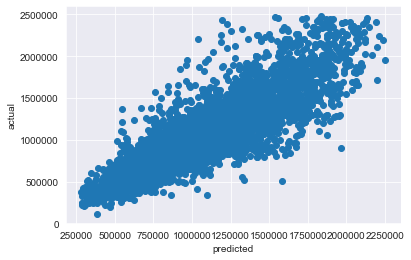

In [87]:
# Plot predicted vs actual prices from the Random Forest Regressor
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [88]:
# New DF with predictions against their actual values to find a percentage for accuracy in predictions.
rf_predictions = pd.DataFrame([rf_pred, y_test]).transpose()

rf_predictions['abs_error'] = np.abs(rf_predictions[0] - rf_predictions[1])
rf_predictions['percentage_error'] = rf_predictions['abs_error'] / rf_predictions[1] * 100
rf_predictions.percentage_error.mean()

15.628038079178285

### Running Thoughts:
* Seems quite robust for properties under $1.5 million.
* How much closer will "digging deeper" take the model?
* 15.5% error on the test predictions - not too bad, prefer to bring it under 10% though.

In [89]:
# Display the hyperparameters of the best performing model
fitted_models['rf'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features=0.33,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

## Insights & Analysis

The primary objective of this project was to determine if we could build a relatively acurate prediction model for the housing market, based on just a handfull of inputs.

In the end, we arrived at a model which would take just 5 inputs for a property listing, and return a price prediction which is (on average) within 16% of the actual sale price for the home.

The five inputs are:
 1) Property Address
 2) Number of Bedrooms
 3) Number of Bathrooms
 4) Number of Car Spaces
 5) Name of the Real Estate Agency

Working with a free and publicly available dataset for the Melbourne (Australia) Housing Market - irrelevant, missing, ambiguous and questionable data or observations had to be dealt with before any meaningful insights could be extracted.

During the Data Cleanup and Exploration phases of this project, it quickly became apparent that some properties in the dataset were not truly representative of the part of the Melbourne Housing market we really want to predict with a high level of accuracy.

For example, someone looking to buy a $3 million home, or a house with seven bedrooms -  is not likely to be a first home buyer, and can probably afford the services of a buyer's agent.

The end of the market that this model aims to help, is the bottom to middle range of the market. Those who are less educated and informed about the market. For this reason, a maximum was placed on a number of features so we could focus solely on the population in question.

The sample population was restricted to:
* Properties with a value below $2.5 million (Australian Dollars)
* Properties only within the Melbourne Metropolitan Region
* Properties with 6 or less Bedrooms
* Properties with 6 or less Car spaces

The resulting analytical base table was split into "training" and "testing" datasets to help validate the models we trained. Three feature selecting multiple linear regression models, and two decision tree models were trained (with various hyperparameter combinations and cross-validation) on 70% of the data, then scored for accuracy on the remaining 30%.

The two decision tree models most accurately predicted house prices. The Random Forrest Regression model produced the lowest Mean Absolute Error in predictions, whereas the Gradient Boosting Regression model produced a slightly higher R^2 Score (meaning that it explains the variance between predicted and actual prices slightly better than the RF model).

There are a number of ways that this model could be improved upon if required...

1) Better match the sample population to the population of users. Conducting market research into the people who would utilise this model, will allow us to better predict the values of the properties they are looking to buy. For example, perhaps a model focussed on properties under $1.5 million would better suit the end-user. Or perhaps a model which only predicts appartment or townhouse prices is better for this end of the market.

2) Purchase a better dataset. Since we are working with a free dataset, it comes with a few caveats. The information was scrapped, so may be inherently flawed. An excellent way to overcome this issue, would be to purchase/obtain proprietry data collected within the industry. In Melbourne, the relevant industry body is called "The Real Estate Institute of Victoria", and they would be a reputable source for accurate market information.

3) Increase the number of inputs. The original model only requires the user to input five features. These five features were chosen because they are available on almost every single property listing (both newspaper and online). However, many property listings actually provide more information than this. Two inputs which come to mind are "Lot/Land Size", and/or "Building Size/Floorspace". Both of these features are available in our dataset, and would likely improve the models accuracy.

4) Inputs obtained from images. This is not specific to improving the model, but moreso how a user might input the property details. For example, the user takes a photo of the product listing, or uses a phone camera to extract the required information from the listing (OCR). This would also require a machine learning algorithm to be trained to "read" what is required to input into our "prediction" model.